# Overfitting

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# given X[:] input, create vector of polynomial X+X**2+X**3+X**(d)
def make_poly(X, deg):
    n = len(X)
    data = [np.ones(n)]  # X**0 = 1 prepared upfront
    #print(data)
    for d in range(deg):
        data.append(X**(d+1))
        #print(data)
    return np.vstack(data).T

print(make_poly(np.array([1,2,3]), 5))

[[  1.   1.   1.   1.   1.   1.]
 [  1.   2.   4.   8.  16.  32.]
 [  1.   3.   9.  27.  81. 243.]]


In [76]:
# solve MLR with normal equation
def fit(X, Y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(Y))

In [77]:
def fit_and_display( X, Y, sample, deg ):
    N = len(X)
    train_idx = np.random.choice(N,sample) # select 'sample' out of 1~N-1
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]
    
#    plt.scatter(Xtrain,Ytrain)
#    plt.show()
    
    # fit to polynomial 
    Xtrain_poly = make_poly(Xtrain, deg)
    w = fit(Xtrain_poly, Ytrain)
    
    # display the polynomlal 
    X_poly = make_poly(X, deg)
    Y_hat = X_poly.dot(w)
    plt.plot(X,Y) # all given data 
    plt.plot(X,Y_hat,'r-') # predicted by regression 
    plt.scatter(Xtrain,Ytrain) # training data 
    plt.title('deg = %d' % deg)
    plt.show()

In [78]:
# Mean Square Error (MSE)
def get_mse(Y, Yhat): 
    d = Y - Yhat
    return d.dot(d) / len(d)

In [79]:
# 
def plot_train_vs_test_curves(X, Y, sample=20, max_deg=20):
    N = len(X)
    train_idx = np.random.choice(N,sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]
    
    test_idx = [idx for idx in range(N) if idx not in train_idx] # exclusive from train_idx
    Xtest = X[test_idx]
    Ytest = Y[test_idx]
    
    mse_trains = []
    mse_tests  = []
    for deg in range(max_deg+1):
        Xtrain_poly = make_poly(Xtrain, deg)
        w = fit(Xtrain_poly, Ytrain)
        Yhat_train = Xtrain_poly.dot(w)
        mse_train = get_mse(Ytrain, Yhat_train)
        
        Xtest_poly = make_poly(Xtest, deg) 
        Yhat_test = Xtest_poly.dot(w)
        mse_test = get_mse(Ytest, Yhat_test)
        
        mse_trains.append(mse_train)
        mse_tests.append(mse_test)
    
    # MSE of train & test versus degree
    plt.plot(mse_trains, label='train mse', marker='o')
    plt.plot(mse_tests,  label='test mse', marker='o')
    plt.legend()
    plt.show()
    

In [80]:
# Test Data -sin curve
N = 100        # total data 
Nsample = 10   # samples to take from total data 
X = np.linspace(0, 6*np.pi, N)
Y = np.sin(X)

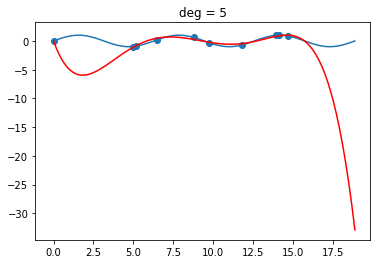

In [81]:
# fit and display deg=5 (up to X**5 dimension)
deg = 5
fit_and_display(X, Y, Nsample, deg)

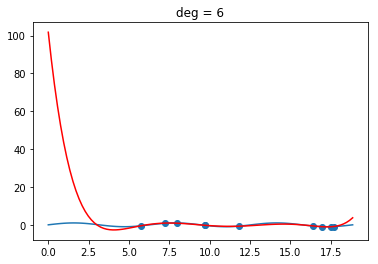

In [82]:
# fit and display deg=6 (up to X**6 dimension)
deg = 6
fit_and_display(X, Y, Nsample, deg)

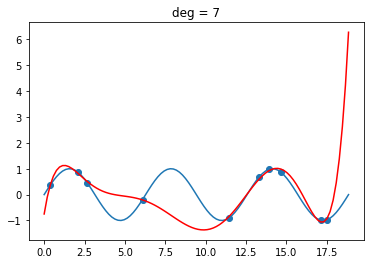

In [83]:
# fit and display deg=7 (up to X**7 dimension)
deg = 7
fit_and_display(X, Y, Nsample, deg)

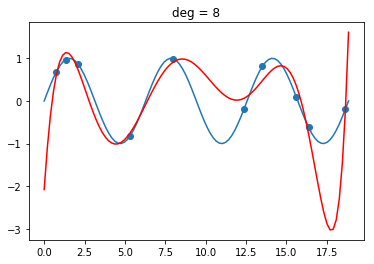

In [84]:
# fit and display deg=8 (up to X**8 dimension)
deg = 8
fit_and_display(X, Y, Nsample, deg)

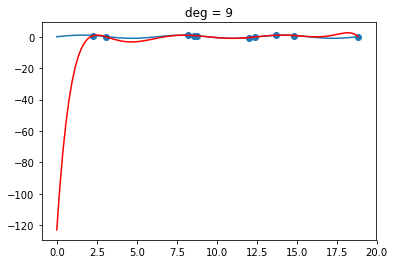

In [85]:
# fit and display deg=9 (up to X**9 dimension)
deg = 9
fit_and_display(X, Y, Nsample, deg)

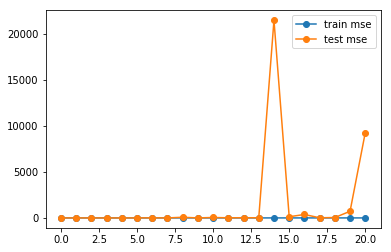

In [87]:
plot_train_vs_test_curves(X, Y)